# Chapter 4

The following in this notebook are my notes and code from Chapter 4 of "Reinforcement Learning: An Introduction" by Sutton and Barto.

Dynamic programming (DP) refers to a set of algorithms that can be used to calculate the optimal policies, given a perfect model of the environment as a Markov decision process.

**"Classical DP algorithms are of limited utility in reinforcement learning both because of their assumption of a perfect model and because of their great computational expense, but they are still important theoretically."**

Typically, we make the assumption that our environment is a finite MDP. Dynamic programming can be applied to problems that have continuous state and action spaces, but then exact solutions are only possible in special cases. One common method of getting approximate solutions for such tasks is to quantize the state and action spaces and then use the finite-state DP algorithms. Methods explored in Part 2 can be applied to continuous problems and are an extension of that approach. 

"Key idea of dynamic programming, and of reinforcement learning generally, is the use of value functions to organize and structure the search for good policies." In this chapter we'll show how dynamic programming can compute the value functions from Chapter 3. We can obtain optimal policies once we've found the optimal value functions, $v_*$ or $q_*$, that meet the Bellman optimality equations:

$v_*(s) = max_a \mathbb{E}[R_{t+1} + \gamma v_*(S_{t+1} | S_t = s, A_t = a]$

$v_*(s) = max_a \sum_{s', r} p(s', r | s, a)[r + \gamma v_*(s') \quad (4.1) \quad$, or

$q_*(s, a) = \mathbb{E}[R_{t+1} + \gamma max_{a'} q_*(S_{t+1}, a') | S_t = s, A_t = a]$

$q_*(s, a) = \sum_{s', r} p(s', r | s, a) [r + \gamma max_{a'} q_*(s', a')] \quad (4.2) \quad$

$\forall \quad s \in S, \space a \in A(s), \space s' \in S^+$

Dynamic programming algorithms are formed by turning these into update rules for improving the approximations of the value functions.

### 4.1 Policy Evaluation (Prediction)

Policy evaluation is how we compute the state-value function $v_\pi$ for a policy $\pi$. It is also referred to as the prediction problem. Recall from ch. 3, $\forall \quad s \in S$,

$v_\pi(s) \stackrel{.}{=} \mathbb{E}_\pi [G_t | S_t = s]$

$v_\pi(s) = \mathbb{E} [R_{t+1} + \gamma G_{t+1} | S_t = s] \quad \quad$ (from (3.9))

$v_\pi(s) = \mathbb{E} [R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s] \quad \quad (4.3)$

$v_\pi(s) = \sum_a \pi(a | s) \sum_{s', r} p(s', r | s, a)[r + \gamma v_k(s')] \quad (4.4)$,

$\pi (a | s)$ is the probability of taking an action $a$ in state $s$ under policy $\pi$. The expected returns and values are subscripted by $\pi$ to indicate that they're conditional on $\pi$ being followed. 'The existence and uniqueness of $v_\pi$ are guaranteed as long as either $\gamma < 1$ or eventual termination is guaranteed from all states under the policy $\pi$.

When environment dynamics are all completely known, 4.4 is a system of $|S|$ linear equations in $|S|$ unknowns. The unknowns are the values of each state $s \in S$. Here, an iterative solution method is best to compute the solutions to the linear system. We arbitrarily choose our initial value approximation, and each subsequent approximation is obtained by using the Bellman equation for $v_\pi (4.4)$ as an update rule.

$v{k+1}(s) \stackrel{.}{=} \mathbb{E}_\pi[R_{t+1} + \gamma v_k (S_{t+1}) | S_t = s]$

$v{k+1}(s) = \sum_{a} \pi(a|s) \sum_{s', r} p(s', r | s, a)[r + \gamma v_k(s')] \quad (4.5)$

$\forall \quad s \in S$

$v_k = v_\pi$ is fixed point for this update rule since the Bellman equation guarantees equality in this case. The sequence of ${v_k}$ can be shown to converge to $v_\pi$ as $k \rightarrow \infty$. This is under the same conditions that guarantee us the existence of $v_\pi$. This algorithm is named *iterative policy evaluation*.

Iterative policy evaluation applies the same operation to each state: replaces the old value of state $s$ with new value, obtained from the old values and from the expected immediate reward along all the possible one-step transitions under the policy that is being evaluated. This operation is called an expected update. "Each iteration of iterative policy evaluation updates the value of every state once to produce the new approximate value function $v_{k+1}$." The kind of expected updates depends on whether we are updating a state or state-action pair, and depends on the way that the estimated values of the later states are combined. Every update done in a dynamic programming algorithm is an expected update because we are updating the values based on an expectation over all possible next states rather than on a sampled next state. 

To code a sequential program for iterative policy evaluation like in (4.5), will need to use two arrays. One array for the values before the latest update ${v_k(s)}$, and one for the values after the latest update ${v_{k+1}(s)}$. Doing it this way, we can compute the new values one at a time from the old values without the old values being manipulated. Or, we can use one array and update the values in place. Doing that, depending on the order that the states are updated, new values might be used instead of old ones on the RHS of equation (4.5). The in-place version of the algorithm will also converge to $v_\pi$. It often will converge faster than the two-array version of the algorithm, because new values are used as soon as they are available. In the in-place version of the algorithm, the order in which states have their values updated during the "sweep" (sweep is one iteration of updates through all states) has a large impact on the rate of convergence. 

Pseudocode from the book for iterative policy evaluation for estimating $V \approx v_\pi$

Input is our policy to be evaluated, $\pi$, a threshold parameter for convergence (as in iterative methods like successive over relaxation or Gauss-Seidel), and an initial guess for $V(s)$, for all $s \in S^+$ except for $V(terminal) = 0$.

Loop 1:

$\delta \leftarrow 0$
    
Loop over each $s\in S$:
    
$v \leftarrow V(S)$
        
$V(s) \leftarrow \sum_{a} \pi(a|s) \sum_{s', r} p(s', r | s, a)[r + \gamma V(s')]$
        
$\delta \leftarrow max(\delta, |v - V(s)|)$
        
until $\delta < \space$ tolerance

**Example 4.1** 4 x 4 gridworld

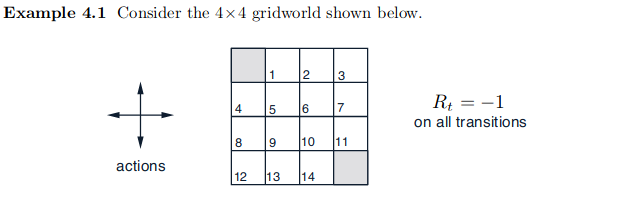

In [9]:
from IPython.display import Image
Image(filename="/home/jfp15b/Documents/senior-practicum/BookNotes/Screenshot from 2019-03-13 19-19-27.png")

Nonterminal states are all not grey states, so $S = {1, 2, \dots, 14}$. Each state has four possible actions, $A = {up, down, left, right}$. The actions deterministically cause the corresponding state transitions. Except for the fact that actions that would take the agent off of the grid instead leave the state unchanged. This task is not discounted and it is episodic. All transitions have a reward of -1 until we reach the terminal state. Even though the terminal state is shown in two places, it is actually one state. Our expected reward function is $r(s, a, s') = -1 \forall \quad$ states $s, s'$ and actions. If the agent follows the equiprobable random policy, then the left side of Figure 4.1 shows the sequence of the value functions ${v_k}$ computed by iterative policy evaluation. The final estimate ends up being $v_\pi$. 

## 4.2 Policy Improvement

Computing the value function for a policy can help us find better policies. Imagine we've got a value function $v_\pi$ for some deterministic policy $\pi$. For a state $s$ we'd like to figure whether we should change the policy so that it deterministically chooses an action $a \neq \pi(s)$. We already know how good it is to follow our current policy, but we want to know if it'd be better to change to a new policy. 

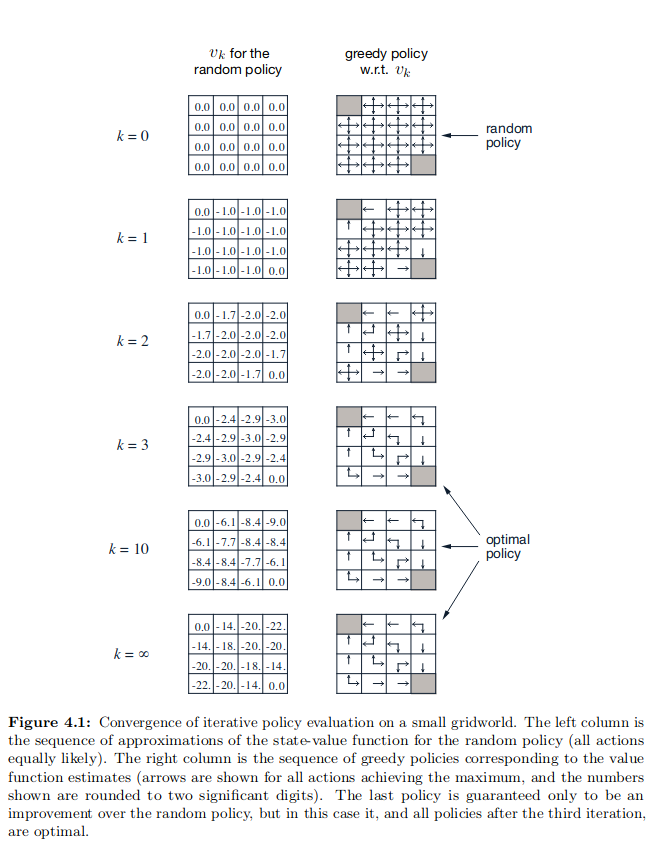

In [2]:
from IPython.display import Image
Image(filename='/home/jfp15b/Documents/senior-practicum/BookNotes/Screenshot from 2019-03-14 13-07-07.png')

A way to answer this is to select $a$ in $s$ and afterward follow the existing policy. The value of doing this is:

$q_\pi(s, a) \stackrel{.}{=} \mathbb{E}[R_{t+1} + \gamma v_\pi(S_{t+1})| S_t = s , A_t = a] \quad (4.6)$

$q_\pi(s, a) = \sum_{s', r} p(s', r | s, a)[r + \gamma v_\pi(s')]$

Key criterion is whether this is reater or less than $v_\pi(s)$. If it is greater (if it's better to select action $a$ once in $s$ and afterward follow $\pi$ than to follow $\pi$ all the time) then we'd expect it to be even better to pick $a$ every time we're in $s$ and that the new policy would be better overall.

This being true is a special case of the *policy improvement theorem*. Have $\pi$ and $\pi'$ be any pair of deterministic policies such that $\forall \quad s \in S$,

$q_\pi(s, \pi'(s)) \geq v_\pi(s) \quad (4.7)$

So policy $\pi'$ has to be at least as good as $\pi$. It has to get greater or equal expected return from all $s \in S$.

$v_{\pi'}(s) \geq v_\pi(s) \quad (4.8)$

"If there is strict inequality of (4.7) at any state, there must also be strict inequality of (4.8) at that state." This applies particularly to the two policies from the paragraph above. Those policies are identical except $\pi'(s) = a \neq \pi(s)$. (4.7) holds at all states besides s. So, if $q_\pi(s, a) > v_\pi(s)$ then $\pi'$ is actually better. 

The proof behind the policy improvement theorem is found by starting at (4.7) and keep expanding the $q_\pi$ side with (4.6) and reapplying (4.7) until getting $v_{\pi'}(s)$:

$v_\pi(s) \leq q_\pi(s, \pi'(s))$

$\quad = \mathbb{E}[R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s, A_t = \pi'(s)] \quad \quad \quad$ (by (4.6))

$\quad = \mathbb{E}_{\pi'}[R_{t+1} + \gamma v_pi(S_{t+1}) | S_t = s]$

$\quad \leq \mathbb{E}_{\pi'}[R_{t+1} + \gamma q_\pi(S_{t+1}, \pi'(S_{t+1})) | S_t = s] \quad \quad \quad$ (by (4.7))

$\quad = \mathbb{E}_{\pi'}[R_{t+1} + \gamma \mathbb{E}_{\pi'}[R_{t+2} + \gamma v_\pi(S_{t+2}) | S_{t+1}, A_{t+1} = \pi'(S_{t+1})] | S_t = s]$

$\quad = \mathbb{E}_{\pi'}[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 v_\pi(S_{t+2}) | S_t = s]$

$\quad \leq \mathbb{E}_{\pi'}[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 v_\pi(S_{t+3}) | S_t = s]$

$\quad \vdots$

$\quad \leq \mathbb{E}_{\pi'}[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 R_{t+4} + \dotsb | S_t = s]$

$\quad = v_{\pi'}(s)$

Lets extend to look at changes of the policy at all states and to all actions we could possibly make. We'll choose the action at each state that appears best according to $q_\pi(s, a)$. This will make the new greedy policy $\pi'$;

$\pi'(s) \stackrel{.}{=} argmax_a q_\pi(s, a)$

$\quad = argmax_a \mathbb{E}[R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s, A_t = a] \quad (4.9)$

$\quad = argmax_a \sum_{s', r} p(s', r | s, a)[r + \gamma v_\pi(s')]$

This greedy policy chooses the action that looks best in the short term with a one step look ahead, according to $v_\pi$. "By construction, the greedy policy meets the conditions of the policy improvement theorem (4.7), so we know that it is as good as, or better than, the original policy." This process of making a new policy that is an improvement over the oldp olicy, by making it greedy with respect to the value function of the old policy is called *policy improvement*.

If the new greedy policy is as good as but not better than the old policy then $v_\pi = v_{\pi'}$ and from (4.9) it follows for all states:

$v_{\pi'}(s) = max_a \mathbb{E}[R_{t+1} + \gamma v_{\pi'}(S_{t+1}) | S_t = s, A_t = a]$

$\quad = max_a \sum_{s', r} p(s', r | s, a)[r + \gamma v_{\pi'}(s')]$.

This is the same thing as the original Bellman optimality equation (4.1) and so $v_{\pi'}$ must be $v_*$ and so both $\pi$ and $\pi'$ have to be optimal policies. The policy improvement has to give us a better policy except for when the original policy is already an optimal one.

"In the general case, a stochastic policy $\pi$ specifies probabilities, $\pi(a|s)$, for taking each action, $a$, in each state, $s$."

The ideas covered here, on deterministic policies, extend easily to stochastic policies. In stochastic policies, the policy improvement theorem is unchanged from the way it is written here. If there is a tie in policy improvement steps like in (4.9) (so if there are multiple actions which have maximal value) then in the stochastic case we can give each action a portion of probability of being selected in the greedy policy. Any scheme for assigning the portions of the probabilities works as long as all of the actions which don't have maximal value are given probability of zero.

Last row of Fig. 4.1 shows an example of policy improvement for a stochastic policy. "Here, the original policy, $\pi$, is the equiprobable random policy, and the new policy, $\pi'$, is greedy with respect to $v_\pi$." The value function is in the bottom-left diagram and the set of possible $\pi'$ is in the bottom right. States with multiple arrows in the $\pi'$ diagram are the states where several actions achieve the maximum value in (4.9). Although here the new policy after the improvement happens to be the optimal policy, in general only an improvement on the original policy is guaranteed.

## 4.3 Policy Iteration 

When policy $\pi$ has been improved using $v_\pi$ to give a new and better policy $\pi'$ we can compute a new value function, $v_{\pi'}$ and again improve it to give us an even better policy $\pi''$. So, we can get a sequence of 'monotonically improving policies and value functions:'

$\pi_0 \stackrel{E}{\rightarrow} v_{\pi_0} \stackrel{I}{\rightarrow} \pi_2 \stackrel{E}{\rightarrow} \dotsb \stackrel{I}{\rightarrow} \pi_* \stackrel{E}{\rightarrow} v_*$

$\stackrel{E}{\rightarrow}$ shows a policy evaluation and $\stackrel{I}{\rightarrow}$ is a policy improvement. 'Each policy is guaranteed to be a strict improvement over the previous one (unless it is already optimal.' Since a finite MDP has a finite number of policies, this policy iteration process has to converge to a optimal policy and optimal value function within a finite num of iterations. 

This is called policy iteration. Each policy evaluation is started with the value function for the previous policy (similar to other iterative methods, where we use a previous approximation to improve the current approximation). This often gives a large increase in the speed of convergence of policy evaluation.

Policy iteration algorithm from the book.

1. Initialization

$V(s) \in \mathbb(R)$ and $\pi(s) \in A(s)$ arbitrarily for all $s \in S$

2. Policy Evaluation

Loop:

$\delta \leftarrow 0$

Loop for each $s \in S$:

$v \leftarrow V(S)$

$V(s) \leftarrow \sum_{s', r} p(s', r | s, \pi(s))[r + \gamma V(s')]$

$\delta \leftarrow max(\delta, |v - V(s)|)$

until $\delta < tolerance$

3. Policy Improvement

*policy-stable* $\leftarrow true$

For each $s \in S$:

*old-action* $\leftarrow \pi(s)$

$\pi(s) \leftarrow argmax_a \sum_{s', r} p(s', r | s, a)[r + \gamma V(s')]$

If *old-action* $\neq \pi(s)$, then *policy-stable* $\leftarrow false$

If *policy-stable*, then stop and return $V \approxeq v_*$ and $\pi \approxeq \pi_*$; else go to 2

## 4.4 Value Iteration

A drawback of policy iteration is, each of its iterations requires policy evaluation steps, and those policy evaluation steps may require multiple sweeps through the entire state-space. If we are performing policy evaluation with an iterative method, then it converges exactly to $v_\pi$ only at the limit. Can we stop short of waiting for exact convergence? Figure 4.1 shows that after 3 policy evaluations, we've converged. So that example could be truncated to only do 3 policy evaluations and the optimal policy would be found. 

"In fact, the policy evaluation step of policy iteration can be truncated in several ways without losing the convergence guarantees of policy iteration." 

An important case of this is called **value iteration**, when policy evaluation is stopped after just one sweep through the state-space. It can be written as a simple update operation that combines policy improvement and truncated policy evaluation steps.

$v_{k+1}(s) \stackrel{.}{=} max_a \mathbb{E}[R_{t+1} + \gamma v_k(S_{t+1}) | S_t = s, A_t = a]$

$ \quad = $